In [48]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

In [49]:

# Generador de datos
def data_generator(board, boards, i):
    if i < 9:
        for value in [1, 0, -1]:  # Posibles valores
            new_board = board.copy()
            new_board[i] = value
            data_generator(new_board, boards, i + 1)
    else:
        boards.append(board)  # Solo añadimos al final de la generación
    return boards


In [50]:

# Función de activación tanh y su derivada
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


In [51]:

# Inicialización del dataset
input_data = np.array(data_generator([0] * 9, [], 0))
output_data = input_data.copy()  # Sin normalización adicional porque usamos tanh


In [65]:

# Parámetros de la red
input_size = 9
hidden_size = 18  # Más neuronas para captar relaciones
output_size = 9
learning_rate = 0.05  # Ajuste más suave
epochs = 10000  # Más iteraciones


In [53]:

# Inicialización de pesos y sesgos
np.random.seed(42)
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
bias_output = np.random.uniform(-1, 1, (1, output_size))



In [ ]:
# Perdida
loss = []

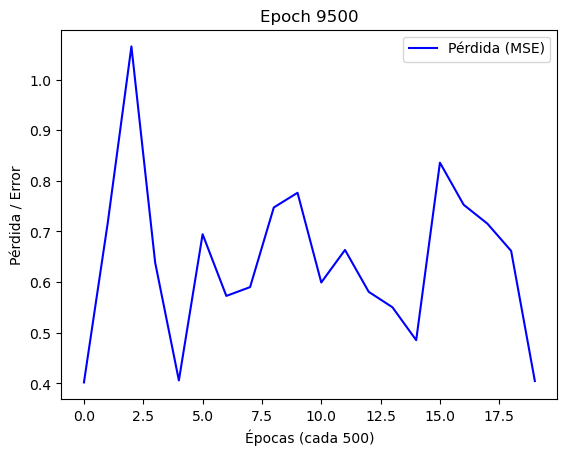

In [66]:
from IPython import display
import matplotlib.pyplot as plt

# Pérdida
loss = []

fig, ax = plt.subplots()

# Entrenamiento
for epoch in range(epochs):
    # Propagación hacia adelante
    hidden_layer_input = np.dot(input_data, weights_input_hidden) + bias_hidden
    hidden_layer_output = tanh(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = tanh(output_layer_input)

    # Cálculo del error
    error = output_data - predicted_output
    mse = np.mean(np.square(error))

    # Propagación hacia atrás
    d_predicted_output = error * tanh_derivative(predicted_output)
    error_hidden_layer = np.dot(d_predicted_output, weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * tanh_derivative(hidden_layer_output)

    # Actualización de pesos y sesgos
    weights_hidden_output += np.dot(hidden_layer_output.T, d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += np.dot(input_data.T, d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Guardar y mostrar la pérdida cada 10 épocas
    if epoch % 500 == 0:
        loss.append(mse)

        # Graficar la pérdida y el error en vivo
        ax.clear()  # Limpiar el gráfico
        ax.plot(loss, label="Pérdida (MSE)", color="blue")
        ax.set_title(f"Epoch {epoch}/{epochs}")
        ax.set_xlabel("Épocas (cada 500)")
        ax.set_ylabel("Pérdida / Error")
        ax.legend()

        display.clear_output(wait=True)  # Limpiar salida en Jupyter
        display.display(plt.gcf())  # Mostrar la figura


In [67]:

# Validación: Mostrar un ejemplo aleatorio
rand_index = random.randint(0, len(input_data) - 1)
print("\nEjemplo aleatorio:")
print("Entrada original: ", input_data[rand_index])
print("Salida predicha: ", np.round(predicted_output[rand_index], 2))


Ejemplo aleatorio:
Entrada original:  [-1  1  1 -1  1 -1  0  0  1]
Salida predicha:  [-1.  1.  1. -1.  1.  1. -1. -1. -1.]


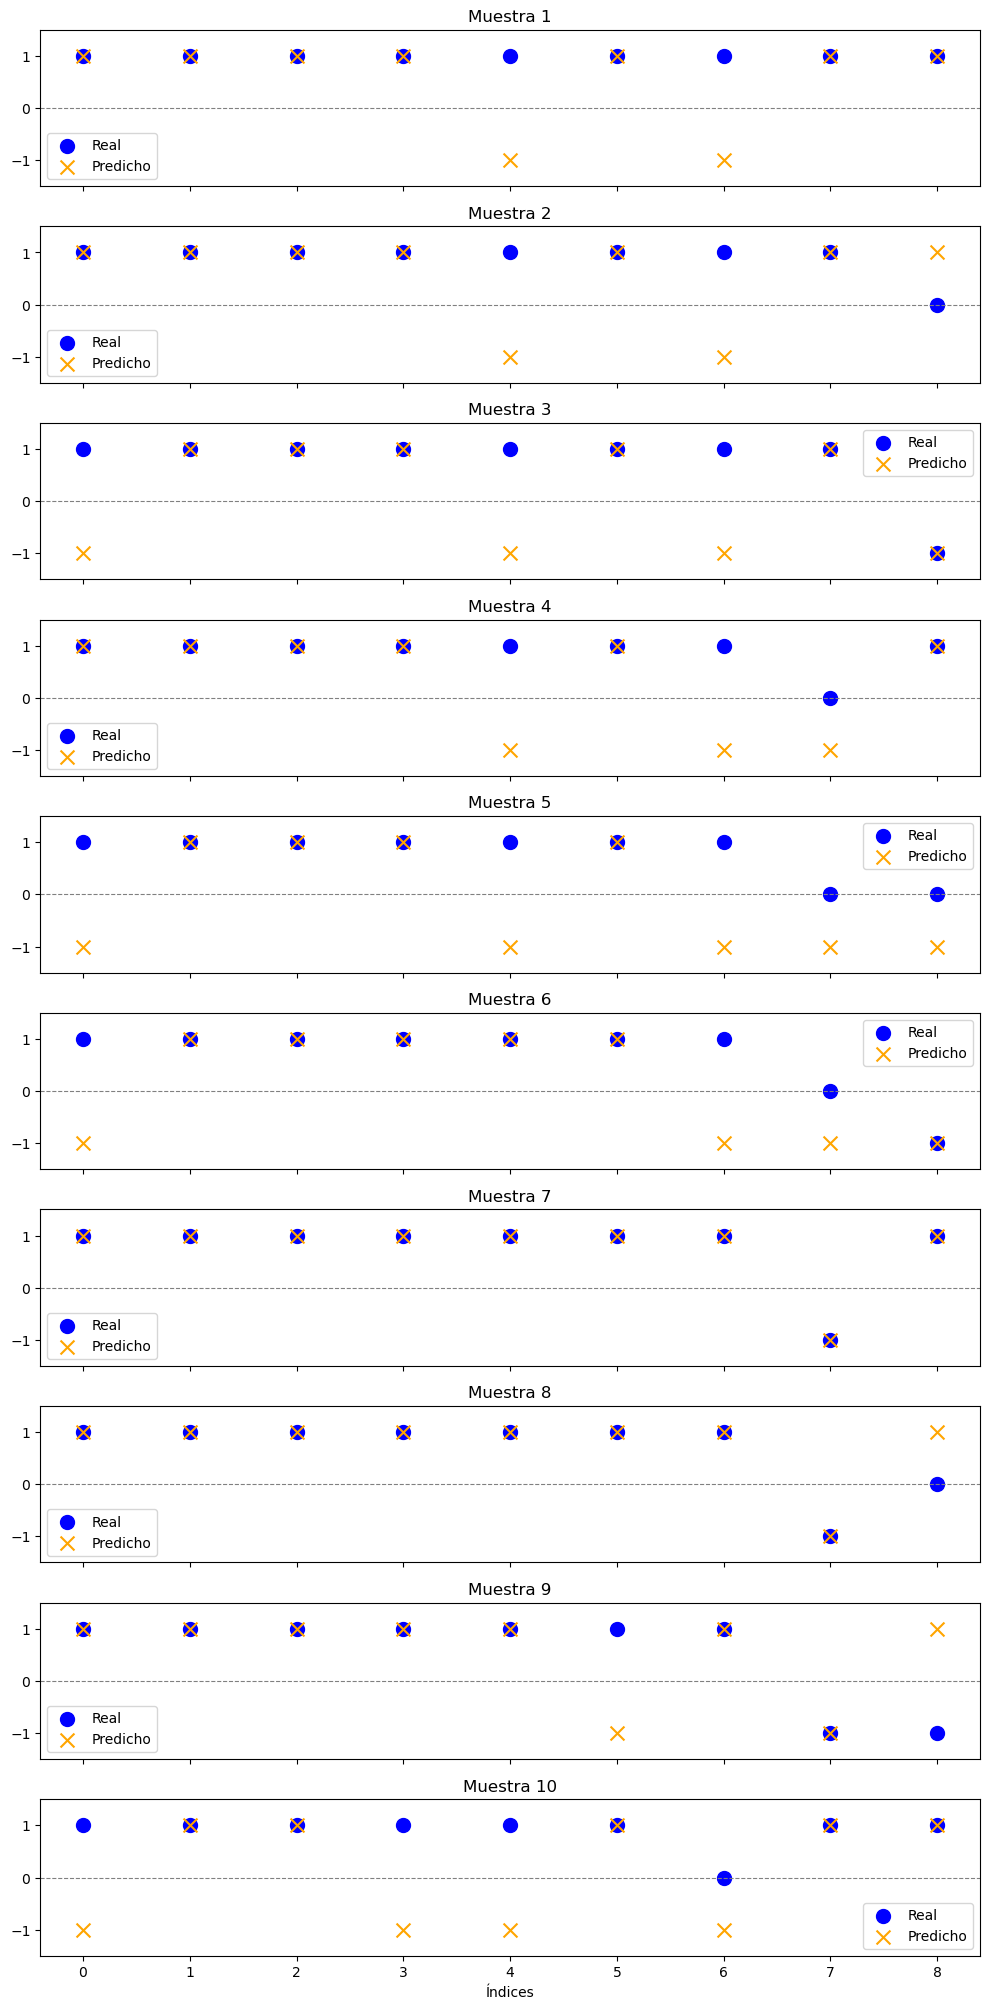

In [69]:

# Gráficos
num_samples = 10  # Número de muestras a graficar
fig, axs = plt.subplots(num_samples, figsize=(10, num_samples * 2), sharex=True)

for i in range(num_samples):
    x = np.arange(9)  # Índices de las columnas
    real_values = output_data[i]  # Valores reales
    predicted_values = predicted_output[i]  # Valores predichos

    # Graficar los puntos reales y predichos
    axs[i].scatter(x, real_values, color='blue', label="Real", s=100)  # Tamaño de los puntos
    axs[i].scatter(x, predicted_values, color='orange', label="Predicho", s=100, marker='x')  # Diferente marcador

    # Añadir una línea base para resaltar los ceros
    axs[i].axhline(0, color="gray", linestyle="--", linewidth=0.8)
    axs[i].set_ylim(-1.5, 1.5)  # Rango adecuado para valores entre -1 y 1
    axs[i].set_title(f"Muestra {i + 1}")
    axs[i].legend()

# Ajustes de diseño
plt.tight_layout()
plt.xlabel("Índices")
plt.show()
